## Naive Bayes Text Classifier and Basic Natural Language Processing 

In this Notebook, we will be using the spam dataset from Kaggle to predict whether an email is spam or ham. Spam detection is one of the most famous applications of the Naive Bayes Classifier and Spam is generally considered an e-mail of undesired qualities while Ham is just a normal e-mail we would receive on a daily basis.  

The dataset can be found from the below link on Kaggle: 
https://www.kaggle.com/uciml/sms-spam-collection-dataset/data


## Import Packages
Lets first import the required packages for this tutorial. 

In [61]:
##Basic Data Processing 
import pandas as pd 

## Language Processing 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

## Word Visualization 
from wordcloud import WordCloud

## Machine Learning Related 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

## Import Dataset

Lets then import the dataset into the spam dataframe which comes from the spam.csv file. We need to specify the encoding as 'latin-1' so the file can be read in properly.

In [62]:
spam = pd.read_csv('spam.csv', encoding='latin-1')

## Data Exploration
Next lets take a look at the dataset and check out the structure with the head function and describe function. With these two functions we can see that we have 5 columns. v1 is the target label of spam or ham while v2 is the raw text of each sms message. There are three columns titled Unnamed:2,3, and 4 which it looks like we can remove as they only contain Nans. 

We can also see with the describe function that there are 5572 messages in this dataset. 

In [63]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


Lets look at what some of our ham and spam e-mails look like. Yea these definitely look like spam.... Lets see if we can predict these sms messages. 

In [65]:
spam['v2'][spam['v1'] == 'spam'][0:5]

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object

In [66]:
spam[spam['v1'] == 'ham'].head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


## Data Cleaning 
As mentioned previoussly we can drop the columns Unnamed:2,3,4 as they are just null values. We can do this with the drop function. In addition, lets rename our columns v1 and v2 to target and message respectively to improve clarity. 

In [67]:
spam = spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [68]:
spam = spam.rename(columns={'v1': 'target', 'v2': 'message'})

Lets look at the dataset again and see how it looks. Looks like everythings all clean now. 

In [69]:
spam.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checklist of NLP Data Cleaning 

Here is a checklist to use to clean your data: (see the code for more details): 

I found this checklist at this link: https://ai.works-hub.com/learn/how-to-solve-90-percent-of-nlp-problems-a-step-by-step-guide-885ea#utm_source=linkedin&utm_medium=nlp&utm_campaign=lukas (How to solve 90 perecent of NLP problems step by step guide) and I feel it is the most comprehensive list for NLP data pre-processing/cleaning. 

For this notebook, we will only perform step 1,2,3,and 4.  

* Remove all irrelevant characters such as any non alphanumeric characters
* Tokenize your text by separating it into individual words
* Remove words that are not relevant, such as “@” twitter mentions or urls
* Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
* Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
* Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)


In this section, we will first illustrate each step 1 by 1 then finally build a final function that performs all of these steps in one shot. For this section we will be using row 4 of spam['message'] to illustrate all of these functions.This message can be seen below.

In [70]:
message = spam['message'][4]
message

"Nah I don't think he goes to usf, he lives around here though"

## Lowercasing 
First, lets begin with lowercasing all of our text as we want to prevent words like hello, Hello, and HELLO from being treated differently. If we use the lower() function we can change every character to be lowercase. 

In [71]:
message.lower()

"nah i don't think he goes to usf, he lives around here though"

## Punctuation Removal
The next step is punctuation removal. Lets look at what is considered punctuation with the string.punctuation command. 

In [72]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

If we perform the below function we can remove punctuation. What the below does is look at every character in the message and returns it if it is not in the string.punctuation list. 

In [73]:
''.join([char for char in message if char not in string.punctuation])

'Nah I dont think he goes to usf he lives around here though'

## Stop Words Removal
The next important step is stopwords removal. Stopwords are pretty much the common words in English that do not have any importance for NLP as they are so common like The, I, and Me. Lets look at the complete list with the nltk package below.

In [74]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We can then remove these stopwords with the below function. The function splits the message and for each word it returns a word if not in the stopwords list. 

In [75]:
' '.join([word for word in message.split() if word not in (stopwords.words('english'))])

'Nah I think goes usf, lives around though'

## Create Function 
Lastly, it is important that we create a function to combine all these steps and make it easier to pre-process our data. Lets label it text_preprocessing.
This function essentially does the below 3 steps: 
* Remove Punctuation/Lowercase all text 
* Remove Uneeded StopWords 
* Returns the Final Processed Text Message

In [76]:
def text_preprocessing(input):
    #1. Remove Punctuation 
    #2. Convert String to Lowercase 
    #3. Remove Stopwords 
    clean = ''.join([char for char in input if char not in string.punctuation]).lower()
    clean = ' '.join([word for word in clean.split() if word not in (stopwords.words('english'))])
    return clean

## Test Function
Lets now test our function out and see if it functions as planned. Here is the original message again. 

In [77]:
message

"Nah I don't think he goes to usf, he lives around here though"

After text processing we can see that punctuation was removed, all characters are lowercase, and stopwords have been removed. Excellent ! 

In [78]:
text_preprocessing(message)

'nah dont think goes usf lives around though'

## Apply Function to all Messages
Lets apply this function to all messages in the dataset to complete our simplified text_preprocessing for this tutorial. 

In [79]:
spam['message'] = spam['message'].apply(text_preprocessing)

## Test/Training Split 
Now we begin the real fun in this tutorial and start the Machine Learning process. Lets split the spam dataframe into a trainset and test set where the ratio is 80/20. 

In [80]:
train_set, test_set = train_test_split(spam, test_size = .2, random_state= 42)

It looks like our data sets were split correctly as evidenced by the describe function. 

In [81]:
train_set.describe()

,target,message
count,4457,4457
unique,2,4155
top,ham,sorry ill call later
freq,3860,22


In [82]:
test_set.describe()

,target,message
count,1115,1115
unique,2,1087
top,ham,sorry ill call later
freq,965,8


## CountVectorizer
We will now create a BagofWords Model with CountVectorizer from SKLearn. The BagofWords model is essentially a count of frequency of all of the words in our raw text data.
Now that our datasets are split into their respective training and test sets. We need to use the CountVectorizer function from sklearn. What the CountVectorizer does is it creates a sparse matrix of all of the sms's and each word that is in each message. A sparse matrix is a matrix with many 0's and 1's only for the values with the words in it. Lets look at a quick example.

In [83]:
vectoriser = CountVectorizer()

In [84]:
count = vectoriser.fit_transform(train_set['message'])

In [85]:
count[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [86]:
target = train_set['target'].values
print(target)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


## Model Training 
Now we will train our Multinomial Naive Bayes model with the previous sparsematrix of words/counts and target values. Model Training Complete!

In [87]:
classifier = MultinomialNB()
classifier.fit(count, target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Training Set Evaluation 
With the predict function we can then generate predictions based on the training set. Lets place these predictions into the ypred array.

In [88]:
ypred = classifier.predict(count)

In [89]:
ypred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Common ways to evaluate classification problems include using a confusion matrix which details the predicted vs actual values and an accuracy score which tells us how many of our predictions were correct. According to our accuracy score it looks like we had around 99% classification accuracy on the training set. 

In [90]:
confusion_matrix(target, ypred)

array([[3844,   16],
       [  15,  582]])

In [91]:
accuracy_score(target, ypred)

0.9930446488669509

## Wordcloud Visualization 
Nowadays Wordclouds are very popular so lets generate one based on the most common words for spam and most common words for ham. As we can see the most common words for spam look like free, new, txt, call, reply. This seems pretty accurate if you think about the context of english spam e-mails.

(-0.5, 399.5, 199.5, -0.5)

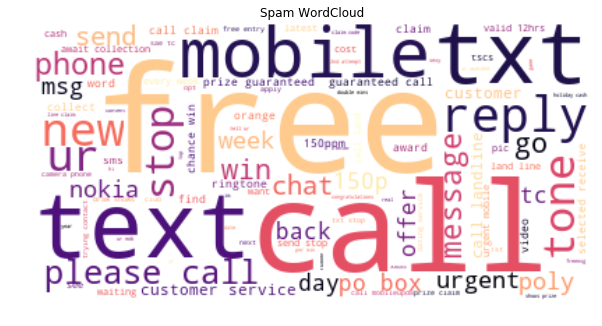

In [92]:
spamwordcloud = WordCloud(background_color='white', colormap='magma',max_words=100).generate(' '.join(train_set['message'][train_set['target'] == 'spam']))
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(spamwordcloud, interpolation='bilinear', cmap='inferno')
plt.title('Spam WordCloud')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

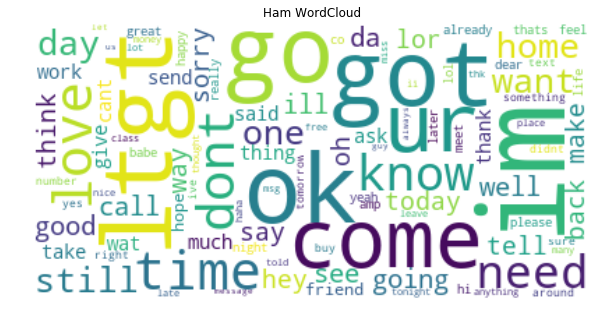

In [93]:
hamwordcloud = WordCloud(background_color='white', colormap='viridis', max_words=100).generate(' '.join(train_set['message'][train_set['target'] == 'ham']))
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(hamwordcloud, interpolation='bilinear')
plt.title('Ham WordCloud')
plt.axis("off")

## Test Set Evaluation
Lastly, it is the moment we have all been waiting for. Lets give see how our final spam predictor performs on unseen test observations. 

First we need to use the transform command on the test_set which creates a sparse matrix based on our previously created matrix for the training data.

In [94]:
testcount = vectoriser.transform(test_set['message'])

In [95]:
testtarget = test_set['target'].values
print(testtarget)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


Lets then generate predictions for our test data as we did for our training data. 

In [96]:
ypredtest = classifier.predict(testcount)

It looks like we were able to get an accuracy of around 98 % with our unseen test data this is great. 

In [97]:
confusion_matrix(testtarget, ypredtest)

array([[961,   4],
       [ 18, 132]])

In [98]:
accuracy_score(testtarget, ypredtest)

0.9802690582959641

## Conclusion
This notebook covered many topics including how to build a Machine Learning Model, Data Exploration, Data Cleaning, Text Preprocessing for NLP Data, Model Training, and Evaluation. Through the Naive Bayes Classifier and Bag of Words Model it was relatively easy to get 98 % prediction accuracy on Spam and Ham E-mails. 